# Exam No 4

This is the code for the fourth exam of DS 405 - NLP submitted by Nico Schwarzer, ID: ID: 5632297.

## Loading in packages, models, embeddings and the datasets

In [ ]:
!pip install datasets

     |████████████████████████████████| 311 kB 5.4 MB/s 
     |████████████████████████████████| 133 kB 40.9 MB/s 
     |████████████████████████████████| 1.1 MB 39.7 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 243 kB 44.3 MB/s 
     |████████████████████████████████| 271 kB 36.7 MB/s 
     |████████████████████████████████| 144 kB 20.4 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 


In [ ]:
!pip install transformers
!pip install sentence-transformers

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 31.4 MB/s 
     |████████████████████████████████| 596 kB 25.0 MB/s 
     |████████████████████████████████| 3.3 MB 37.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 1.2 MB 11.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=e676050513a55668b4c54cb16e40103fb485b7b693b61a2677f7ccd6a6e1444c
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


In [ ]:
import torch
import datasets
from datasets import load_dataset
import pandas as pd
import numpy as np
from gensim.scripts.glove2word2vec import glove2word2vec
from torchtext.vocab import GloVe, vocab
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
from gensim.models import KeyedVectors
from sentence_transformers.util import cos_sim




In [ ]:
## loading 300-dim Glove embeddings 

!wget http://nlp.stanford.edu/data/glove.6B.zip

!unzip glove*.zip

--2022-01-25 14:43:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-25 14:43:26--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-25 14:43:26--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'word2vec.txt'

glove2word2vec(glove_input_file, word2vec_output_file)
model_w2v = KeyedVectors.load_word2vec_format(word2vec_output_file, binary = False)


In [ ]:
## mounting google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now I shall read in and alter all datasets and save the final training and validation sets to my google drive!

In [ ]:
## yahoo_answers_topics

yahoo_answers_topics = load_dataset("yahoo_answers_topics", split = "train")

yahoo_topic = yahoo_answers_topics['topic']
yahoo_answers = yahoo_answers_topics['best_answer']
yahoo_df = pd.DataFrame({"topic":yahoo_topic, "text": yahoo_answers})

#mapping to strings (not integers) describing the labels 
reference_labels_yahoo = {0:yahoo_answers_topics.features['topic'].names[0], 1:yahoo_answers_topics.features['topic'].names[1],2:yahoo_answers_topics.features['topic'].names[2],3:yahoo_answers_topics.features['topic'].names[3],
                          4:yahoo_answers_topics.features['topic'].names[4],5:yahoo_answers_topics.features['topic'].names[5],6:yahoo_answers_topics.features['topic'].names[6],7:yahoo_answers_topics.features['topic'].names[7],
                          8:yahoo_answers_topics.features['topic'].names[8],9:yahoo_answers_topics.features['topic'].names[9]}


yahoo_df['topic'] = yahoo_df['topic'].map(reference_labels_yahoo)

# spliiting into train and validation 

yahoo_df_val = yahoo_df.sample(n = 1000,  replace = False, random_state = 120)
yahoo_df_train = yahoo_df.drop(yahoo_df_val.index)

yahoo_df_val.head()

,topic,text
233117,Health,"The answer is no, not all KBOs are planets. If..."
426437,Computers & Internet,Top 10 in 2001 (source: http://www.kariera.orc...
208965,Sports,Follow the link.\n\nhttp://www.pcdoctor-guide....
379045,Politics & Government,"A shirt,jacket,cologne,dadadadadadadada.Mix it..."
8710,Computers & Internet,Try online Etymology Dictionary:\nwww.etymonli...


In [ ]:
# saving to csv

yahoo_df_train.to_csv('/content/gdrive/My Drive/DS405B_NLP/yahoo_df_train.csv')
yahoo_df_val.to_csv('/content/gdrive/My Drive/DS405B_NLP/yahoo_df_val.csv')


Importantly, the topics all have underscores. There are replaced with tabs so that the word tokenization works properly. 

In [ ]:
## banking 77 

banking_77 = load_dataset("banking77", split = "train")


banking_77_text = banking_77['text']
banking_77_topic = banking_77['label']

banking_df = pd.DataFrame({"topic":banking_77_topic, "text": banking_77_text})



# re-mapping the labels 

names_list_banking = banking_77.features["label"].names
num_list_banking = list(range(len(names_list_banking)))
zip_iterator_banking = zip(num_list_banking, names_list_banking)


reference_levels_banking = dict(zip_iterator_banking)
banking_df['topic'] = banking_df['topic'].map(reference_levels_banking)

banking_df.topic = banking_df.topic.str.replace('_',' ')


banking_df_val = banking_df.sample(n = 1000,  replace = False, random_state = 123)
banking_df_train = banking_df.drop(banking_df_val.index)

banking_df_val.head()


Using custom data configuration default
Reusing dataset banking77 (/root/.cache/huggingface/datasets/banking77/default/1.1.0/aec0289529599d4572d76ab00c8944cb84f88410ad0c9e7da26189d31f62a55b)


,topic,text
1024,card delivery estimate,I'm worried my card might be lost in the mail?...
9405,cash withdrawal charge,I got charged a fee that shouldn't be there fr...
9368,cash withdrawal charge,Do you charge for making a withdrawal? I took ...
3414,balance not updated after cheque or cash deposit,Is there an issue with my account? I don't se...
7402,receiving money,Are there ways for other people to send me money?


As can be ssen above, te topics all have underscores. There are replaced with tabs so that the word tokenization works properly. 

In [ ]:
banking_df_val.topic = banking_df_val.topic.str.replace('_',' ')
banking_df_train.topic = banking_df_train.topic.str.replace('_',' ')

banking_df_val.head() ## much better :D

,topic,text
1024,card delivery estimate,I'm worried my card might be lost in the mail?...
9405,cash withdrawal charge,I got charged a fee that shouldn't be there fr...
9368,cash withdrawal charge,Do you charge for making a withdrawal? I took ...
3414,balance not updated after cheque or cash deposit,Is there an issue with my account? I don't se...
7402,receiving money,Are there ways for other people to send me money?


In [ ]:
# saving to csv

banking_df_train.to_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_train.csv')
banking_df_val.to_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_val.csv')


In [ ]:
## tweet eval emotion 

tweet_emotion = load_dataset("tweet_eval", "emotion", split = "train")
tweet_emotion_text = tweet_emotion['text']
tweet_emotion_topic = tweet_emotion['label']
emotion_df = pd.DataFrame({"topic":tweet_emotion_topic, "text": tweet_emotion_text})

# re-mapping the labels 

names_list_emotion =  tweet_emotion.features["label"].names
num_list_emotion = list(range(len(names_list_emotion )))
zip_iterator_emotion = zip(num_list_emotion, names_list_emotion)

reference_levels_emotion = dict(zip_iterator_emotion)
emotion_df['topic'] = emotion_df['topic'].map(reference_levels_emotion)


emotion_df_val = emotion_df.sample(n = 1000,  replace = False, random_state = 123)
emotion_df_train = emotion_df.drop(emotion_df_val.index)


emotion_df_val.head()

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/134k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/569 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/183 [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/emotion/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


,topic,text
1491,anger,Spurs radio commentator referred to Mauricio P...
1313,sadness,@user I know smh. My heart sunk into my stomach.
2392,anger,When your sister is 19 and throws legitimate t...
2655,anger,@user Yikes. The wrath of Maddie...
1331,sadness,also i had an awful nightmare involving being ...


In [ ]:
# saving to csv
emotion_df_train.to_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_train.csv')
emotion_df_val.to_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_val.csv')


In [ ]:
## tweet eval sentiment

tweet_sentiment = load_dataset("tweet_eval", "sentiment", split = "train")
tweet_sentiment_text = tweet_sentiment['text']
tweet_sentiment_topic = tweet_sentiment['label']

sentiment_df = pd.DataFrame({"topic":tweet_sentiment_topic, "text": tweet_sentiment_text})


# re-mapping the labels 

names_list =  tweet_sentiment.features["label"].names
num_list = list(range(len(names_list )))
zip_iterator = zip(num_list, names_list)

reference_levels_sentiment = dict(zip_iterator)
sentiment_df['topic'] = sentiment_df['topic'].map(reference_levels_sentiment)


sentiment_df_val = sentiment_df.sample(n = 1000,  replace = False, random_state = 123)
sentiment_df_train = sentiment_df.drop(sentiment_df_val.index)


sentiment_df_val.head()

  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


,topic,text
42070,neutral,another week. C. wants to take him to a gay ba...
1563,neutral,Gucci may be a famous rapper but he's still in...
19179,positive,Please join me in welcoming our next US Senato...
36335,positive,Drew Peterson is #Untouchable no more! Check o...
40434,positive,@user @user yes ga!!! I may not know how to dr...


In [ ]:
# saving to csv

sentiment_df_train.to_csv('/content/gdrive/My Drive/DS405B_NLP/sentiment_df_train.csv')
sentiment_df_val.to_csv('/content/gdrive/My Drive/DS405B_NLP/sentiment_df_val.csv')


Now, I shall retrieve the 5000 most comon tokens form each training dataset and remove those words for which ones does not have the glove embeddings. Without the glove embeddings, no mapping to a latent space can be trained!

This step is relevant for tasks 3 and 4!


In [ ]:
from torchtext.data.utils import get_tokenizer
from collections import Counter

tokenizer = get_tokenizer('basic_english')
list_glove_words = list(model_w2v.vocab)


In [ ]:
# for the yahoo answer data

yahoo_df_train = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/yahoo_df_train.csv')

list_yahoo = []

for i in range(yahoo_df_train.shape[0]):
  text = tokenizer(str(yahoo_df_train.text[i]))

  list_yahoo.append(text)
  print(i)

# flattening list 
list_yahoo = [y for x in list_yahoo for y in x]

Count_yahoo = Counter(list_yahoo)
top_5000_yahoo = Count_yahoo.most_common(5000)

top_5000_yahoo = pd.DataFrame(top_5000_yahoo)
top_5000_yahoo.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_5000_yahoo.csv')

# another df with only those words for which one has glove embeddings 

top_yahoo_glove = top_5000_yahoo[top_5000_yahoo[0].isin(list_glove_words)]
top_yahoo_glove.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_yahoo_glove.csv')


In [ ]:
## for the banking data 

banking_df_train = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_train.csv')

list_banking = []

for i in range(banking_df_train.shape[0]):
  text = tokenizer(str(banking_df_train.text[i]))
  list_banking.append(text)


# flattening list 
list_banking = [y for x in list_banking for y in x]


Count_banking = Counter(list_banking)
top_5000_banking = Count_banking.most_common(5000)

top_5000_banking = pd.DataFrame(top_5000_banking)
top_5000_banking.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_5000_banking.csv')

# another df with only those words for which one has glove embeddings 

top_banking_glove = top_5000_banking[top_5000_banking[0].isin(list_glove_words)]
top_banking_glove.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_banking_glove.csv')


In [ ]:
## for the emotion data 

emotion_df_train = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_train.csv')

list_emotion = []

for i in range(emotion_df_train.shape[0]):
  text = tokenizer(str(emotion_df_train.text[i]))
  list_emotion.append(text)

# flattening list 
list_emotion = [y for x in list_emotion for y in x]

Count_emotion = Counter(list_emotion)
top_5000_emotion = Count_emotion.most_common(5000)

top_5000_emotion = pd.DataFrame(top_5000_emotion)
top_5000_emotion.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_5000_emotion.csv')


# another df with only those words for which one has glove embeddings 

top_emotion_glove = top_5000_emotion[top_5000_emotion[0].isin(list_glove_words)]
top_emotion_glove.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_emotion_glove.csv')



In [ ]:
## for the sentiment data 

sentiment_df_train = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/sentiment_df_train.csv')

list_sentiment = []

for i in range(sentiment_df_train.shape[0]):
  text = tokenizer(str(sentiment_df_train.text[i]))
  list_sentiment.append(text)

# flattening list 
list_sentiment = [y for x in list_sentiment for y in x]

Count_sentiment = Counter(list_sentiment)
top_5000_sentiment = Count_sentiment.most_common(5000)

top_5000_sentiment = pd.DataFrame(top_5000_sentiment)
top_5000_sentiment.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_5000_sentiment.csv')

# another df with only those words for which one has glove embeddings 

top_sentiment_glove = top_5000_sentiment[top_5000_sentiment[0].isin(list_glove_words)]
top_sentiment_glove.to_csv('/content/gdrive/My Drive/DS405B_NLP/top_sentiment_glove.csv')



## 1) Implementing Method 1 

The first method relys on computing the mean of all Glove embeddings per token.

In [ ]:
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english')
list_glove_words = list(model_w2v.vocab) ## list of all words for which one has the glove embeddings!


### Yahoo Answer Data

In [ ]:
yahoo_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/yahoo_df_val.csv')


In [ ]:
# setting a new index so that a loop ofver a range can be called

yahoo_df_val.index = list(range(yahoo_df_val.shape[0]))

In [ ]:
# checking for nans 

yahoo_df_val.isnull().any(axis=1).sum()

20

Since tere are some NA vlaues, I shall remove them. If either the topic or the text is a NA, the classification will fail (of course).

In [ ]:
## removing nans

yahoo_df_val = yahoo_df_val.dropna()

In [ ]:
## now the index needs to be re-set :D

yahoo_df_val.index = list(range(yahoo_df_val.shape[0]))

In [ ]:
## mean glove embeddings per topic description

embeddings_yahoo_topics = []

list_true_yahoo_topics = list(yahoo_df_val.topic)
list_yahoo_topics = list(np.unique(list_true_yahoo_topics))

for topic in list_yahoo_topics:
  
  text_topic = tokenizer(topic)
  
  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text_topic:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])

  mean_embedding = np.mean(embeddings, axis = 0)
  embeddings_yahoo_topics.append(mean_embedding)


Since it might be the case that for some texts, not a single word is in the Glove Vocab, I have implemented a counter instead of just blindly assuming that for all 1000 texts, there is at least one embedding.

In [ ]:
tp_yahoo = 0
counter_texts = 0

for i in range(yahoo_df_val.shape[0]):

  text = tokenizer(str(yahoo_df_val.text[i]))

  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])

  # only considering texts for which at least one word is in the Glove vocab 
  if len(embeddings) > 0:
    mean_embedding_text = np.mean(embeddings, axis = 0)

    # computing similarities
    cos_sims = np.ones(len(list_yahoo_topics))

    for j in range(len(list_yahoo_topics)):
      cos_sims[j] = cos_sim(embeddings_yahoo_topics[j], mean_embedding_text)

    max_cos_sim = np.argmax(cos_sims)
    pred_topic = list_yahoo_topics[max_cos_sim]

    if pred_topic == list_true_yahoo_topics[i]:
      tp_yahoo += 1 
    
    counter_texts += 1




In [ ]:
print(f"The accuracy score for the validation set of the yahoo answer DF based on the first method is {tp_yahoo/counter_texts}")

The accuracy score for the validation set of the yahoo answer DF based on the first method is 0.15487179487179487


### Banking 77 Data

In [ ]:
banking_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_val.csv')


In [ ]:
# setting a new index so that a loop ofver a range can be called

banking_df_val.index = list(range(banking_df_val.shape[0]))

In [ ]:
# checking for nans 
banking_df_val.isnull().any(axis=1).sum()

0

In [ ]:
list_true_banking_topics = list(banking_df_val.topic)
list_banking_topics = list(np.unique(list_true_banking_topics))


In [ ]:
## mean glove embeddings per topic description

embeddings_banking_topics = []

list_true_banking_topics = list(banking_df_val.topic)
list_banking_topics = list(np.unique(list_true_banking_topics))

for topic in list_banking_topics:
  
  text_topic = tokenizer(topic)
  
  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text_topic:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])

  mean_embedding = np.mean(embeddings, axis = 0)
  embeddings_banking_topics.append(mean_embedding)


In [ ]:
tp_banking = 0
counter_texts_banking = 0


for i in range(banking_df_val.shape[0]):

  text = tokenizer(str(banking_df_val.text[i]))

  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])


  # only considering texts for which at least one word is in the Glove vocab 
  if len(embeddings) > 0:

    mean_embedding_text = np.mean(embeddings, axis = 0)

    # computing similarities
    cos_sims = np.ones(len(list_banking_topics))

    for j in range(len(list_banking_topics)):
      cos_sims[j] = cos_sim(embeddings_banking_topics[j], mean_embedding_text)

    max_cos_sim = np.argmax(cos_sims)
    pred_topic = list_banking_topics[max_cos_sim]

    if pred_topic == list_true_banking_topics[i]:
      tp_banking += 1 

    counter_texts_banking += 1



In [ ]:

print(f"The accuracy score for the validation set of the Banking data DF based on the first method is {tp_banking/counter_texts_banking}")

The accuracy score for the validation set of the Banking data DF based on the first method is 0.109


### Emotion Data

In [ ]:
emotion_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_val.csv')


In [ ]:
# setting a new index so that a loop ofver a range can be called

emotion_df_val.index = list(range(emotion_df_val.shape[0]))

In [ ]:
# checking for nans 
emotion_df_val.isnull().any(axis=1).sum()

0

In [ ]:
list_true_emotion_topics = list(emotion_df_val.topic)
list_emotion_topics = list(np.unique(list_true_emotion_topics))


In [ ]:
## mean glove embeddings per topic description

embeddings_emotion_topics = []

list_true_emotion_topics = list(emotion_df_val.topic)
list_emotion_topics = list(np.unique(list_true_emotion_topics))

for topic in list_emotion_topics:
  
  text_topic = tokenizer(topic)
  
  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text_topic:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])

  mean_embedding = np.mean(embeddings, axis = 0)
  embeddings_emotion_topics.append(mean_embedding)


In [ ]:
tp_emotion = 0
counter_texts_emotion = 0


for i in range(emotion_df_val.shape[0]):

  text = tokenizer(str(emotion_df_val.text[i]))

  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])


  # only considering texts for which at least one word is in the Glove vocab 
  if len(embeddings) > 0:

    mean_embedding_text = np.mean(embeddings, axis = 0)

    # computing similarities
    cos_sims = np.ones(len(list_emotion_topics))

    for j in range(len(list_emotion_topics)):
      cos_sims[j] = cos_sim(embeddings_emotion_topics[j], mean_embedding_text)

    max_cos_sim = np.argmax(cos_sims)
    pred_topic = list_emotion_topics[max_cos_sim]

    if pred_topic == list_true_emotion_topics[i]:
      tp_emotion += 1 

    counter_texts_emotion += 1



In [ ]:

print(f"The accuracy score for the validation set of the Emotion Data based on the first method is {tp_emotion/counter_texts_emotion}")

The accuracy score for the validation set of the Emotion Data based on the first method is 0.463


### Sentiment Data

In [ ]:
sentiment_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/sentiment_df_val.csv')


In [ ]:
# setting a new index so that a loop ofver a range can be called

sentiment_df_val.index = list(range(sentiment_df_val.shape[0]))

In [ ]:
# checking for nans 
sentiment_df_val.isnull().any(axis=1).sum()

0

In [ ]:
list_true_sentiment_topics = list(sentiment_df_val.topic)
list_sentiment_topics = list(np.unique(list_true_sentiment_topics))


In [ ]:
## mean glove embeddings per topic description

embeddings_sentiment_topics = []

list_true_sentiment_topics = list(sentiment_df_val.topic)
list_sentiment_topics = list(np.unique(list_true_sentiment_topics))

for topic in list_sentiment_topics:
  
  text_topic = tokenizer(topic)
  
  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text_topic:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])

  mean_embedding = np.mean(embeddings, axis = 0)
  embeddings_sentiment_topics.append(mean_embedding)


In [ ]:
tp_sentiment = 0
counter_texts_sentiment = 0


for i in range(sentiment_df_val.shape[0]):

  text = tokenizer(str(sentiment_df_val.text[i]))

  # get the embeddings of all all words for which one has the glove embeddigs 
  embeddings = []

  for word in text:
    if (word in list_glove_words) == True:
      embeddings.append(model_w2v[str(word)])


  # only considering texts for which at least one word is in the Glove vocab 
  if len(embeddings) > 0:

    mean_embedding_text = np.mean(embeddings, axis = 0)

    # computing similarities
    cos_sims = np.ones(len(list_sentiment_topics))

    for j in range(len(list_sentiment_topics)):
      cos_sims[j] = cos_sim(embeddings_sentiment_topics[j], mean_embedding_text)

    max_cos_sim = np.argmax(cos_sims)
    pred_topic = list_sentiment_topics[max_cos_sim]

    if pred_topic == list_true_sentiment_topics[i]:
      tp_sentiment += 1 

    counter_texts_sentiment += 1



In [ ]:

print(f"The accuracy score for the validation set of the Sentiment Data based on the first method is {tp_sentiment/counter_texts_sentiment}")

The accuracy score for the validation set of the Sentiment Data based on the first method is 0.415


## 2) Implementing Method 2

Now, I shall implement the second method based on the 'all-mpnet-base-v2'- Sentence Transformer

In [ ]:
model_2 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

device = torch.device("cuda")
model_2 = model_2.to(device)

#### For the Yahoo Answers DF

In [ ]:
yahoo_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/yahoo_df_val.csv')


Again, the NAs have to be removed!

In [ ]:
## removing nans

yahoo_df_val = yahoo_df_val.dropna()

In [ ]:
## embedding the text and the topics
list_true_yahoo_topics = list(yahoo_df_val.topic)
list_yahoo_topics = list(np.unique(list_true_yahoo_topics))

embeddings_yahoo_2 = model_2.encode(list(pd.Series(yahoo_df_val.text, dtype='str')))
embeddings_yahoo_2_topics = model_2.encode(list_yahoo_topics)

In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_yahoo = 0

for i in range(embeddings_yahoo_2.shape[0]):

  embedding_here = list(embeddings_yahoo_2[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(embeddings_yahoo_2_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_yahoo_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_yahoo_topics[i]:
    counter_tp_yahoo += 1 


In [ ]:
print(f"The accuracy score for the validation set of the yahoo answer DF based on the second method is {counter_tp_yahoo/yahoo_df_val.shape[0]}")

The accuracy score for the validation set of the yahoo answer DF based on the second method is 0.497


#### For the Banking 77 DF

In [ ]:
banking_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_val.csv')


In [ ]:
## embedding the text and the topics
list_true_banking_topics = list(banking_df_val.topic)
list_banking_topics = list(np.unique(list_true_banking_topics))


embeddings_banking_2 = model_2.encode(list(pd.Series(banking_df_val.text, dtype='str')))
embeddings_banking_2_topics = model_2.encode(list_banking_topics)

In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_banking = 0

for i in range(embeddings_banking_2.shape[0]):

  embedding_here = list(embeddings_banking_2[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(embeddings_banking_2_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_banking_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_banking_topics[i]:
    counter_tp_banking += 1 


In [ ]:
print(f"The accuracy score for the validation set of the banking 77 DF based on the second method is {counter_tp_banking/1000}")

The accuracy score for the validation set of the banking 77 DF based on the second method is 0.595


#### For the Tweet Emotion DF

In [ ]:
emotion_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_val.csv')


In [ ]:
## embedding the text and the topics
list_true_emotion_topics = list(emotion_df_val.topic)
list_emotion_topics = list(np.unique(list_true_emotion_topics))

embeddings_emotion_2 = model_2.encode(list(emotion_df_val.text))
embeddings_emotion_2_topics = model_2.encode(list_emotion_topics)

In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_emotion = 0

for i in range(embeddings_emotion_2.shape[0]):

  embedding_here = list(embeddings_emotion_2[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(embeddings_emotion_2_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_emotion_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_emotion_topics[i]:
    counter_tp_emotion += 1 


In [ ]:
print(f"The accuracy score for the validation set of the Emotion Tweets DF based on the second method is {counter_tp_emotion/1000}")

The accuracy score for the validation set of the Emotion Tweets DF based on the second method is 0.609


#### For the Tweet Sentiment DF

In [ ]:
sentiment_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/sentiment_df_val.csv')


In [ ]:
## embedding the text and the topics
list_true_sentiment_topics = list(sentiment_df_val.topic)
list_sentiment_topics = list(np.unique(list_true_sentiment_topics))

embeddings_sentiment_2 = model_2.encode(list(sentiment_df_val.text))
embeddings_sentiment_2_topics = model_2.encode(list_sentiment_topics)

In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_sentiment = 0

for i in range(embeddings_sentiment_2.shape[0]):

  embedding_here = list(embeddings_sentiment_2[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(embeddings_sentiment_2_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_sentiment_topics[np.argmax(cos_sims)]


  if most_similar_label == list_true_sentiment_topics[i]:
    counter_tp_sentiment += 1 


In [ ]:
print(f"The accuracy score for the validation set of the Sentiment Tweets DF based on the second method is {counter_tp_sentiment/1000}")

The accuracy score for the validation set of the Sentiment Tweets DF based on the second method is 0.461


## 3) Third Method

Note that the SBERT model is task 2 and task 3 is the same one, so it can be re-used!

In [ ]:
from sklearn.linear_model import Ridge


### For the Yahoo Answer Data

I shall now get the mapping from SBERT to Glove Dimension for the Yahoo Train Data using the top 1000 words to start with.

In [ ]:
top_yahoo_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_yahoo_glove.csv')


In [ ]:
# getting top 1000 words (tht are in glove vocabulary)


top_yahoo_glove_1000 = top_yahoo_glove.iloc[0:1000,]

## getting SBERT embeddings 
SBERT_yahoo_1000 = model_2.encode(list(top_yahoo_glove_1000['0']))

## getting Glove Embeddings
Glove_1000_yahoo = []

for i in list(top_yahoo_glove_1000['0']):
  Glove_1000_yahoo.append(model_w2v[str(i)] )

Glove_1000_yahoo = np.array(Glove_1000_yahoo)

# setting up ridge regression 

ridge_yahoo = Ridge(alpha=0.1) 
ridge_yahoo.fit(SBERT_yahoo_1000, Glove_1000_yahoo)

Ridge(alpha=0.1)

Now, having learned the mapping from the top 1000 words in the training data, we can use that mapping to map all sentence embeddings of the validation texts and labels and perform the cosine similarity classification procedure.

Some intermediary results such as the embeddings of the topics and the texts can be re-used from task 2.

In [ ]:
## mapping to 300-dimensional subspace

subspace_yahoo = ridge_yahoo.predict(embeddings_yahoo_2)
subspace_yahoo_topics = ridge_yahoo.predict(embeddings_yahoo_2_topics)



In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_yahoo = 0

for i in range(subspace_yahoo.shape[0]):

  embedding_here = list(subspace_yahoo[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_yahoo_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_yahoo_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_yahoo_topics[i]:
    counter_tp_yahoo += 1 


In [ ]:
print(f"The accuracy score for the validation set of the Yahoo DF based on the third method is {counter_tp_yahoo/subspace_yahoo.shape[0]}")

The accuracy score for the validation set of the Yahoo DF based on the third method is 0.431


### For the Banking Data

I shall now get the mapping from SBERT to Glove Dimension for the Banking Train Data using the top 1000 words to start with.

In [ ]:
top_banking_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_banking_glove.csv')


In [ ]:
# getting top 1000 words (tht are in glove vocabulary)

top_banking_glove_1000 = top_banking_glove.iloc[0:1000,]

## getting SBERT embeddings 
SBERT_banking_1000 = model_2.encode(list(top_banking_glove_1000['0']))

## getting Glove Embeddings
Glove_1000_banking = []

for i in list(top_banking_glove_1000['0']):
  Glove_1000_banking.append(model_w2v[str(i)] )

Glove_1000_banking = np.array(Glove_1000_banking)

# setting up ridge regression 

ridge_banking = Ridge(alpha=0.1) 
ridge_banking.fit(SBERT_banking_1000, Glove_1000_banking)

Ridge(alpha=0.1)

Now, having learned the mapping from the top 1000 words in the training data, we can use that mapping to map all sentence embeddings of the validation texts and labels and perform the cosine similarity classification procedure.

Some intermediary results such as the embeddings of the topics and the texts can be re-used from task 2.

In [ ]:
## mapping to 300-dimensional subspace

subspace_banking = ridge_banking.predict(embeddings_banking_2)
subspace_banking_topics = ridge_banking.predict(embeddings_banking_2_topics)



In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_banking = 0

for i in range(subspace_banking.shape[0]):

  embedding_here = list(subspace_banking[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_banking_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_banking_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_banking_topics[i]:
    counter_tp_banking += 1 


In [ ]:
print(f"The accuracy score for the validation set of the Banking DF based on the third method is {counter_tp_banking/1000}")

The accuracy score for the validation set of the Banking DF based on the third method is 0.578


### For the Tweet Emotion Data

I shall now get the mapping from SBERT to Glove Dimension for the Emotion Data using the top 1000 words to start with.

In [ ]:
top_emotion_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_emotion_glove.csv')


In [ ]:
# getting top 1000 words (tht are in glove vocabulary)

top_emotion_glove_1000 = top_emotion_glove.iloc[0:1000,]

## getting SBERT embeddings 
SBERT_emotion_1000 = model_2.encode(list(top_emotion_glove_1000['0']))

## getting Glove Embeddings
Glove_1000_emotion = []

for i in list(top_emotion_glove_1000['0']):
  Glove_1000_emotion.append(model_w2v[str(i)] )

Glove_1000_emotion = np.array(Glove_1000_emotion)

# setting up ridge regression 

ridge_emotion = Ridge(alpha=0.1) 
ridge_emotion.fit(SBERT_emotion_1000, Glove_1000_emotion)

Ridge(alpha=0.1)

Now, having learned the mapping from the top 1000 words in the training data, we can use that mapping to map all sentence embeddings of the validation texts and labels and perform the cosine similarity classification procedure.

Some intermediary results such as the embeddings of the topics and the texts can be re-used from task 2.

In [ ]:
## mapping to 300-dimensional subspace

subspace_emotion = ridge_emotion.predict(embeddings_emotion_2)
subspace_emotion_topics = ridge_emotion.predict(embeddings_emotion_2_topics)



In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_emotion = 0

for i in range(subspace_emotion.shape[0]):

  embedding_here = list(subspace_emotion[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_emotion_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_emotion_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_emotion_topics[i]:
    counter_tp_emotion += 1 


In [ ]:
print(f"The accuracy score for the validation set of the Emotion Tweets DF based on the third method is {counter_tp_emotion/1000}")

The accuracy score for the validation set of the Emotion Tweets DF based on the third method is 0.629


### For the Tweet Sentiment Data

I shall now get the mapping from SBERT to Glove Dimension for the Sentiment Data using the top 1000 words to start with.

In [ ]:
top_sentiment_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_sentiment_glove.csv')


In [ ]:
# getting top 1000 words (tht are in glove vocabulary)

top_sentiment_glove_1000 = top_sentiment_glove.iloc[0:1000,]

## getting SBERT embeddings 
SBERT_sentiment_1000 = model_2.encode(list(top_sentiment_glove_1000['0']))

## getting Glove Embeddings
Glove_1000_sentiment = []

for i in list(top_sentiment_glove_1000['0']):
  Glove_1000_sentiment.append(model_w2v[str(i)] )

Glove_1000_sentiment = np.array(Glove_1000_sentiment)

# setting up ridge regression 

ridge_sentiment = Ridge(alpha=0.1) 
ridge_sentiment.fit(SBERT_sentiment_1000, Glove_1000_sentiment)

Ridge(alpha=0.1)

Now, having learned the mapping from the top 1000 words in the training data, we can use that mapping to map all sentence embeddings of the validation texts and labels and perform the cosine similarity classification procedure.

Some intermediary results such as the embeddings of the topics and the texts can be re-used from task 2.

In [ ]:
## mapping to 300-dimensional subspace

subspace_sentiment = ridge_sentiment.predict(embeddings_sentiment_2)
subspace_sentiment_topics = ridge_sentiment.predict(embeddings_sentiment_2_topics)



In [ ]:
## computing cosine similarities between each embedding and each label embedding
## counting correct assignment to the labels

counter_tp_sentiment = 0

for i in range(subspace_sentiment.shape[0]):

  embedding_here = list(subspace_sentiment[i])

  cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_sentiment_topics)]).flatten(0).detach().numpy()
  most_similar_label = list_sentiment_topics[np.argmax(cos_sims)]

  if most_similar_label == list_true_sentiment_topics[i]:
    counter_tp_sentiment += 1 


In [ ]:
print(f"The accuracy score for the validation set of the Sentiment Tweets DF based on the third method is {counter_tp_sentiment/1000}")

The accuracy score for the validation set of the Sentiment Tweets DF based on the third method is 0.406


## 4) Hyperparameter Search



Now, the best good number for the most frequent words shall be found. The numbers for which I shall conduct this hyper-parameter search for each dataset are 150,600,1200,1700,2200, 2700, 3200.

In [ ]:
numbers = [150,600,1200,1700,2200, 3000, 4000]


In [ ]:
from sklearn.linear_model import Ridge

# calling another model so that the code above does not need to be executed for task 4)
model_4 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

device = torch.device("cuda")
model_4 = model_4.to(device)

#### For the Yahoo Answers DF

In [ ]:
yahoo_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/yahoo_df_val.csv')
top_yahoo_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_yahoo_glove.csv')


In [ ]:
## embedding the text and the topics - again so that the code above need not be executed again :)

list_true_yahoo_topics = list(yahoo_df_val.topic)
list_yahoo_topics = list(np.unique(list_true_yahoo_topics))

embeddings_yahoo_4 = model_4.encode(list(pd.Series(yahoo_df_val.text, dtype='str')))
embeddings_yahoo_4_topics = model_4.encode(list_yahoo_topics)

In [ ]:
for num in numbers:

  # getting the X - most common words
  top_yahoo_glove_x = top_yahoo_glove.iloc[0:num,]

  ## getting SBERT embeddings 
  SBERT_yahoo_x = model_4.encode(list(top_yahoo_glove_x['0']))

  ## getting Glove Embeddings
  Glove_x_yahoo = []

  for i in list(top_yahoo_glove_x['0']):
    Glove_x_yahoo.append(model_w2v[str(i)] )

  Glove_x_yahoo = np.array(Glove_x_yahoo)

  # setting up ridge regression 

  ridge_yahoo = Ridge(alpha=0.1) 
  ridge_yahoo.fit(SBERT_yahoo_x, Glove_x_yahoo)

  ## mapping to 300-dimensional subspace

  subspace_yahoo = ridge_yahoo.predict(embeddings_yahoo_4)
  subspace_yahoo_topics = ridge_yahoo.predict(embeddings_yahoo_4_topics)


  ## computing cosine similarities between each embedding and each label embedding
  ## counting correct assignment to the labels

  counter_tp_yahoo = 0

  for i in range(subspace_yahoo.shape[0]):

    embedding_here = list(subspace_yahoo[i])

    cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_yahoo_topics)]).flatten(0).detach().numpy()
    most_similar_label = list_yahoo_topics[np.argmax(cos_sims)]

    if most_similar_label == list_true_yahoo_topics[i]:
      counter_tp_yahoo += 1 


  print(f"The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the {num} most frequent words is {counter_tp_yahoo/subspace_yahoo.shape[0]}")



The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 150 most frequent words is 0.259
The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 600 most frequent words is 0.41
The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 1200 most frequent words is 0.427
The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 1700 most frequent words is 0.448
The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 2200 most frequent words is 0.456
The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 3000 most frequent words is 0.441
The accuracy score for the validation set of the Yahoo DF based on the fouth third method for the 4000 most frequent words is 0.462


Apparently, for a well-stuited number of the most frequent words for the Yahoo Answer Data is 2200.

#### For the Banking DF

In [ ]:
banking_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_val.csv')
top_banking_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_banking_glove.csv')


In [ ]:
## embedding the text and the topics - again so that the code above need not be executed again :)

list_true_banking_topics = list(banking_df_val.topic)
list_banking_topics = list(np.unique(list_true_banking_topics))

embeddings_banking_4 = model_4.encode(list(pd.Series(banking_df_val.text, dtype='str')))
embeddings_banking_4_topics = model_4.encode(list_banking_topics)

In [ ]:
for num in numbers:

  # getting the X - most common words
  top_banking_glove_x = top_banking_glove.iloc[0:num,]

  ## getting SBERT embeddings 
  SBERT_banking_x = model_4.encode(list(top_banking_glove_x['0']))

  ## getting Glove Embeddings
  Glove_x_banking = []

  for i in list(top_banking_glove_x['0']):
    Glove_x_banking.append(model_w2v[str(i)] )

  Glove_x_banking = np.array(Glove_x_banking)

  # setting up ridge regression 

  ridge_banking = Ridge(alpha=0.1) 
  ridge_banking.fit(SBERT_banking_x, Glove_x_banking)

  ## mapping to 300-dimensional subspace

  subspace_banking = ridge_banking.predict(embeddings_banking_4)
  subspace_banking_topics = ridge_banking.predict(embeddings_banking_4_topics)


  ## computing cosine similarities between each embedding and each label embedding
  ## counting correct assignment to the labels

  counter_tp_banking = 0

  for i in range(subspace_banking.shape[0]):

    embedding_here = list(subspace_banking[i])

    cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_banking_topics)]).flatten(0).detach().numpy()
    most_similar_label = list_banking_topics[np.argmax(cos_sims)]

    if most_similar_label == list_true_banking_topics[i]:
      counter_tp_banking += 1 


  print(f"The accuracy score for the validation set of the Banking DF based on the fouth third method for the {num} most frequent words is {counter_tp_banking/subspace_banking.shape[0]}")



The accuracy score for the validation set of the Banking DF based on the fouth third method for the 150 most frequent words is 0.552
The accuracy score for the validation set of the Banking DF based on the fouth third method for the 600 most frequent words is 0.586
The accuracy score for the validation set of the Banking DF based on the fouth third method for the 1200 most frequent words is 0.586
The accuracy score for the validation set of the Banking DF based on the fouth third method for the 1700 most frequent words is 0.581
The accuracy score for the validation set of the Banking DF based on the fouth third method for the 2200 most frequent words is 0.573
The accuracy score for the validation set of the Banking DF based on the fouth third method for the 3000 most frequent words is 0.575
The accuracy score for the validation set of the Banking DF based on the fouth third method for the 4000 most frequent words is 0.575


Apparently, for a well-stuited numbers of the most frequent words for the Banking Data are 600/1200.

#### For the Emotion DF

In [ ]:
emotion_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_val.csv')
top_emotion_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_emotion_glove.csv')


In [ ]:
## embedding the text and the topics - again so that the code above need not be executed again :)

list_true_emotion_topics = list(emotion_df_val.topic)
list_emotion_topics = list(np.unique(list_true_emotion_topics))

embeddings_emotion_4 = model_4.encode(list(pd.Series(emotion_df_val.text, dtype='str')))
embeddings_emotion_4_topics = model_4.encode(list_emotion_topics)

In [ ]:
for num in numbers:

  # getting the X - most common words
  top_emotion_glove_x = top_emotion_glove.iloc[0:num,]

  ## getting SBERT embeddings 
  SBERT_emotion_x = model_4.encode(list(top_emotion_glove_x['0']))

  ## getting Glove Embeddings
  Glove_x_emotion = []

  for i in list(top_emotion_glove_x['0']):
    Glove_x_emotion.append(model_w2v[str(i)] )

  Glove_x_emotion = np.array(Glove_x_emotion)

  # setting up ridge regression 

  ridge_emotion = Ridge(alpha=0.1) 
  ridge_emotion.fit(SBERT_emotion_x, Glove_x_emotion)

  ## mapping to 300-dimensional subspace

  subspace_emotion = ridge_emotion.predict(embeddings_emotion_4)
  subspace_emotion_topics = ridge_emotion.predict(embeddings_emotion_4_topics)

  ## computing cosine similarities between each embedding and each label embedding
  ## counting correct assignment to the labels

  counter_tp_emotion = 0

  for i in range(subspace_emotion.shape[0]):

    embedding_here = list(subspace_emotion[i])

    cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_emotion_topics)]).flatten(0).detach().numpy()
    most_similar_label = list_emotion_topics[np.argmax(cos_sims)]

    if most_similar_label == list_true_emotion_topics[i]:
      counter_tp_emotion += 1 


  print(f"The accuracy score for the validation set of the Emotion DF based on the fouth third method for the {num} most frequent words is {counter_tp_emotion/subspace_emotion.shape[0]}")



The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 150 most frequent words is 0.348
The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 600 most frequent words is 0.584
The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 1200 most frequent words is 0.595
The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 1700 most frequent words is 0.607
The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 2200 most frequent words is 0.601
The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 3000 most frequent words is 0.597
The accuracy score for the validation set of the Emotion DF based on the fouth third method for the 4000 most frequent words is 0.575


Apparently, for a well-stuited number of the most frequent words for the Emotion Data is 1000 as the accuracy reported from the third method is the highest.

#### For the Sentiment DF

In [ ]:
sentiment_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/sentiment_df_val.csv')
top_sentiment_glove = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/top_sentiment_glove.csv')


In [ ]:
## embedding the text and the topics - again so that the code above need not be executed again :)

list_true_sentiment_topics = list(sentiment_df_val.topic)
list_sentiment_topics = list(np.unique(list_true_sentiment_topics))

embeddings_sentiment_4 = model_4.encode(list(pd.Series(sentiment_df_val.text, dtype='str')))
embeddings_sentiment_4_topics = model_4.encode(list_sentiment_topics)

In [ ]:
for num in numbers:

  # getting the X - most common words
  top_sentiment_glove_x = top_sentiment_glove.iloc[0:num,]

  ## getting SBERT embeddings 
  SBERT_sentiment_x = model_4.encode(list(top_sentiment_glove_x['0']))

  ## getting Glove Embeddings
  Glove_x_sentiment = []

  for i in list(top_sentiment_glove_x['0']):
    Glove_x_sentiment.append(model_w2v[str(i)] )

  Glove_x_sentiment = np.array(Glove_x_sentiment)

  # setting up ridge regression 

  ridge_sentiment = Ridge(alpha=0.1) 
  ridge_sentiment.fit(SBERT_sentiment_x, Glove_x_sentiment)

  ## mapping to 300-dimensional subspace

  subspace_sentiment = ridge_sentiment.predict(embeddings_sentiment_4)
  subspace_sentiment_topics = ridge_sentiment.predict(embeddings_sentiment_4_topics)

  ## computing cosine similarities between each embedding and each label embedding
  ## counting correct assignment to the labels

  counter_tp_sentiment = 0

  for i in range(subspace_sentiment.shape[0]):

    embedding_here = list(subspace_sentiment[i])

    cos_sims = torch.tensor([cos_sim(embedding_here, x ) for x in list(subspace_sentiment_topics)]).flatten(0).detach().numpy()
    most_similar_label = list_sentiment_topics[np.argmax(cos_sims)]

    if most_similar_label == list_true_sentiment_topics[i]:
      counter_tp_sentiment += 1 


  print(f"The accuracy score for the validation set of the Sentiment DF based on the fouth method for the {num} most frequent words is {counter_tp_sentiment/subspace_sentiment.shape[0]}")



The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 150 most frequent words is 0.462
The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 600 most frequent words is 0.419
The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 1200 most frequent words is 0.368
The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 1700 most frequent words is 0.405
The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 2200 most frequent words is 0.431
The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 3000 most frequent words is 0.381
The accuracy score for the validation set of the Sentiment DF based on the fouth method for the 4000 most frequent words is 0.374


Apparently, for a well-stuited number of the most frequent words for the Yahoo Answer Data is 1000 as the accuracy reported from the third method is the highest.

## 5) Training Supervised Models

Now, supervised models basedn on the Banking 77 Data and the Tweet Emotion Data will be trained and evaluated on the validation datasets respectively.

### Banking 77 Data

In [ ]:
banking_df_train = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_train.csv')
banking_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/banking_df_val.csv')



Here, One can re-use the names list and the num list for the banking DF to create dictionaries to map the topic strings back to integers for the training of the supervised models. For the banking data, the underscores now have to be used again!

In [ ]:
# calling
zip_iterator_banking_2 = zip(names_list_banking, num_list_banking)

reference_levels_banking_2 = dict(zip_iterator_banking_2)

# uusing underscores
banking_df_train.topic = banking_df_train.topic.str.replace(' ','_')
banking_df_val.topic = banking_df_val.topic.str.replace(' ','_')

## re-map to integers for topic labels
banking_df_train['topic'] = banking_df_train['topic'].map(reference_levels_banking_2)
banking_df_val['topic'] = banking_df_val['topic'].map(reference_levels_banking_2)



In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import AutoModel, BertTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sentence_transformers import losses
from torch.utils.data import DataLoader
from sentence_transformers import models, SentenceTransformer



In [ ]:
bert = models.Transformer('bert-base-uncased')

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
bert.

<bound method Module.get_parameter of Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel >

I shall check for the length of the texts to determine a useful maximum length! If one uses 512, the network training becomes extremely slow.

In [ ]:
# encode text
tokenized_text_banking = tokenizer.batch_encode_plus(list(banking_df_train.text), padding=True)


In [ ]:
lengths_text_banking = [len(i.split()) for i in banking_df_train.text]


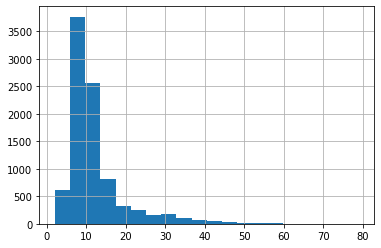

In [ ]:
pd.Series(lengths_text_banking).hist(bins = 20) # 50 good cut-off point!


In [ ]:
tokens_train_banking = tokenizer.batch_encode_plus(
    list(banking_df_train.text),
    max_length = 50,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val_banking = tokenizer.batch_encode_plus(
   list(banking_df_val.text),
    max_length = 50,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
## convert lists to tensors

train_seq_banking = torch.tensor(tokens_train_banking['input_ids'])
train_mask_banking = torch.tensor(tokens_train_banking['attention_mask'])
train_y_banking = torch.tensor(list(banking_df_train.topic))

val_seq_banking = torch.tensor(tokens_val_banking['input_ids'])
val_mask_banking = torch.tensor(tokens_val_banking['attention_mask'])
val_y_banking = torch.tensor(list(banking_df_val.topic))


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Batch Size
batch_size = 120

## Training Dataloader

train_data_banking = TensorDataset(train_seq_banking, train_mask_banking, train_y_banking)
train_sampler_banking = RandomSampler(train_data_banking)
train_dataloader_banking = DataLoader(train_data_banking, sampler=train_sampler_banking, batch_size=batch_size)


## Validation Dataloader

val_data_banking = TensorDataset(val_seq_banking, val_mask_banking, val_y_banking)
val_sampler_banking = SequentialSampler(val_data_banking)
val_dataloader_banking = DataLoader(val_data_banking, sampler = val_sampler_banking, batch_size=batch_size)

In [ ]:
len(np.unique(banking_77_topic))

77

Setting up the entire model.  To make sure that the pooling layer is not freezed, I shall take a look at all parameters!

In [ ]:
for name, param in bert.named_parameters():
    if param.requires_grad == True:
        print(name) 

In [ ]:
# freeze all BERT parameters
for param in list(bert.parameters())[-2:]:
  print(param.shape)


torch.Size([768, 768])
torch.Size([768])


The last 2 layers shall not be freezed!

In [ ]:
class BertClassifier(nn.Module):

    def __init__(self, dropout, output_dim):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # freeze all BERT parameters but pooling ones
        for param in list(self.bert.parameters())[:-2]:
          param.requires_grad = False

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, output_dim)

    def forward(self, input_id, mask):


        # just the pooled output
        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
       
        return linear_output



In [ ]:
model_banking = BertClassifier(0.1, 77)

device = torch.device("cuda")
model_banking = model_banking.to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model_banking.parameters(), lr = 1e-3) # I have found a LR of 1e-3 to be working well here!


Now, I shall train the model on the banking training data.

The last 2 appear to be the params of the pooling layer!

In [ ]:
train_loss_epoch = []
val_loss_epoch = []

num_epochs = 100

for epoch in range(num_epochs):

  train_loss_batch = []

  model_banking.train()
  for batch in train_dataloader_banking:

    optimizer.zero_grad()
    sent_id, mask, labels = batch[0], batch[1], batch[2]
    preds = model_banking(sent_id.to(device), mask.to(device))
    loss = criterion(preds, labels.to(device))
    train_loss_batch.append(loss.item())
    loss.backward()
    optimizer.step()

  model_banking.eval()
  val_loss_batch = []

  with torch.no_grad():
    for batch in train_dataloader_banking:

      sent_id, mask, labels = batch[0], batch[1], batch[2]
      preds = model_banking(sent_id.to(device), mask.to(device))
      loss = criterion(preds,labels.to(device))
      val_loss_batch.append(loss.item())

  train_loss_epoch.append(np.mean(np.array(train_loss_batch)  ))
  val_loss_epoch.append(np.mean(np.array(val_loss_batch)))

  ## implementing early stopping
  if (epoch > 30) & (np.argmax(val_loss_epoch[-3::])  == 2 ):
    break



  print(f'Epoch {epoch}  Training Loss: {train_loss_epoch[epoch]}')
  print(f'Epoch {epoch}  Validation Loss: {val_loss_epoch[epoch]}')

Epoch 0  Training Loss: 3.5492628185372603
Epoch 0  Validation Loss: 2.3846404975966404
Epoch 1  Training Loss: 2.098107298738078
Epoch 1  Validation Loss: 1.3993677591022693
Epoch 2  Training Loss: 1.4948227107524872
Epoch 2  Validation Loss: 1.049220093771031
Epoch 3  Training Loss: 1.2326196287023394
Epoch 3  Validation Loss: 0.8745109493795195
Epoch 4  Training Loss: 1.058110191633827
Epoch 4  Validation Loss: 0.7232479986391569
Epoch 5  Training Loss: 0.9802935813602648
Epoch 5  Validation Loss: 0.657535042025541
Epoch 6  Training Loss: 0.8876249296100516
Epoch 6  Validation Loss: 0.5909783977426981
Epoch 7  Training Loss: 0.8347815939862477
Epoch 7  Validation Loss: 0.5189783777061262
Epoch 8  Training Loss: 0.7772260425906432
Epoch 8  Validation Loss: 0.5200571123706667
Epoch 9  Training Loss: 0.786676889971683
Epoch 9  Validation Loss: 0.4618757422523279
Epoch 10  Training Loss: 0.766774277153768
Epoch 10  Validation Loss: 0.42450727120433984
Epoch 11  Training Loss: 0.71275060

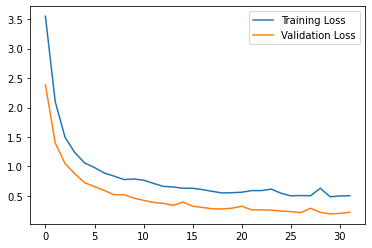

In [ ]:
import matplotlib.pyplot as plt 

length = len(train_loss_epoch)
epochs = list(range(length))

plt.plot(epochs, train_loss_epoch)
plt.plot(epochs, val_loss_epoch)

plt.legend(["Training Loss", "Validation Loss"], loc='upper right')
plt.show()



The performace seems to be even better on the validation data, which is nice!

In [ ]:
## saving Model 

#saving the model 
model_save_name = 'exam_3_model_banking.pth'
path = F"/content/gdrive/My Drive/DS405B_NLP/{model_save_name}" 
torch.save(model_banking, path)




In [ ]:
## evaluating accuracy-wise 

all_data_banking = 0
tp_banking = 0


with torch.no_grad():
  
  for batch in train_dataloader_banking:
    sent_id, mask, labels = batch[0], batch[1], batch[2]
    preds = model_banking(sent_id.to(device), mask.to(device))

    # getting the predictions
    prediction_list = list(np.argmax(preds.cpu().detach().numpy(), axis = 1))

    labels_list = list(labels.cpu().detach().numpy())

    ## computing true positives and summing up all data points 
    for i in range(len(prediction_list)):
      all_data_banking += 1
      if prediction_list[i] == labels_list[i]:
        tp_banking += 1
   
   

In [ ]:
print(f"The accuracy score for the validation set of the Banking Data based on the supervised method is {tp_banking/all_data_banking}")

The accuracy score for the validation set of the Banking Data based on the supervised method is 0.9324669554592914


### Tweet Emotion Data

In [ ]:
emotion_df_train = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_train.csv')
emotion_df_val = pd.read_csv('/content/gdrive/My Drive/DS405B_NLP/emotion_df_val.csv')



Here, One can re-use the names list and the num list for the emotion Data  to create dictionaries to map the topic strings back to integers for the training of the supervised models.

In [ ]:
# calling
zip_iterator_emotion_2 = zip(names_list_emotion, num_list_emotion)

reference_levels_emotion_2 = dict(zip_iterator_emotion_2)

## re-map to integers for topic labels
emotion_df_train['topic'] = emotion_df_train['topic'].map(reference_levels_emotion_2)
emotion_df_val['topic'] = emotion_df_val['topic'].map(reference_levels_emotion_2)



I shall check for the length of the texts to determine a useful maximum length!

In [ ]:
# encode text
tokenized_text_emotion = tokenizer.batch_encode_plus(list(emotion_df_train.text), padding=True)


In [ ]:
lengths_text_emotion = [len(i.split()) for i in emotion_df_train.text]


pd.Series(lengths_text_emotion).hist(bins = 20) # 30 good cut-off point!



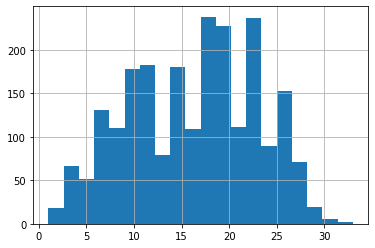

In [ ]:
pd.Series(lengths_text_emotion).hist(bins = 20) # 30 good cut-off point!


In [ ]:
## tokenization 

tokens_train_emotion = tokenizer.batch_encode_plus(
    list(emotion_df_train.text),
    max_length = 30,
    pad_to_max_length=True,
    truncation=True
)


tokens_val_emotion = tokenizer.batch_encode_plus(
   list(emotion_df_val.text),
    max_length = 30,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
## convert lists to tensors

train_seq_emotion = torch.tensor(tokens_train_emotion['input_ids'])
train_mask_emotion = torch.tensor(tokens_train_emotion['attention_mask'])
train_y_emotion = torch.tensor(list(emotion_df_train.topic))

val_seq_emotion = torch.tensor(tokens_val_emotion['input_ids'])
val_mask_emotion = torch.tensor(tokens_val_emotion['attention_mask'])
val_y_emotion = torch.tensor(list(emotion_df_val.topic))


In [ ]:
# Batch Size
batch_size = 120

## Training Dataloader

train_data_emotion = TensorDataset(train_seq_emotion, train_mask_emotion, train_y_emotion)
train_sampler_emotion = RandomSampler(train_data_emotion)
train_dataloader_emotion = DataLoader(train_data_emotion, sampler=train_sampler_emotion, batch_size=batch_size)

## Validation Dataloader

val_data_emotion = TensorDataset(val_seq_emotion, val_mask_emotion, val_y_emotion)
val_sampler_emotion = SequentialSampler(val_data_emotion)
val_dataloader_emotion = DataLoader(val_data_emotion, sampler = val_sampler_emotion, batch_size=batch_size)




Now, we can create another instance of the BERT Classifier object created above. I shall later the output dimension to fit this dataset!

In [ ]:
num_topics_emotion = len(np.unique(emotion_df_train.topic))

In [ ]:
model_emotion = BertClassifier(0.05, num_topics_emotion)

device = torch.device("cuda")
model_emotion = model_emotion.to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:

criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model_emotion.parameters(), lr = 1e-3)


Now, I shall train the model on the banking training data.

In [ ]:
train_loss_epoch = []
val_loss_epoch = []

num_epochs = 100

for epoch in range(num_epochs):


  train_loss_batch = []

  model_emotion.train()
  for batch in train_dataloader_emotion:

    optimizer.zero_grad()
    sent_id, mask, labels = batch[0], batch[1], batch[2]
    preds = model_emotion(sent_id.to(device), mask.to(device))
    loss = criterion(preds,labels.to(device))
    train_loss_batch.append(loss.item())
    loss.backward()
    optimizer.step()

  model_emotion.eval()
  val_loss_batch = []

  with torch.no_grad():
    for batch in train_dataloader_emotion:

      sent_id, mask, labels = batch[0], batch[1], batch[2]
      preds = model_emotion(sent_id.to(device), mask.to(device))
      loss = criterion(preds,labels.to(device))
      val_loss_batch.append(loss.item())

  train_loss_epoch.append(np.mean(np.array(train_loss_batch)  ))
  val_loss_epoch.append(np.mean(np.array(val_loss_batch)))

  ## implementing early stopping
  if (epoch > 30) & (np.argmax(val_loss_epoch[-3::])  == 2 ):
    break



  print(f'Epoch {epoch}  Training Loss: {train_loss_epoch[epoch]}')
  print(f'Epoch {epoch}  Validation Loss: {val_loss_epoch[epoch]}')

Epoch 0  Training Loss: 1.2006981247349788
Epoch 0  Validation Loss: 0.9939360744074771
Epoch 1  Training Loss: 0.9456141747926411
Epoch 1  Validation Loss: 0.8056035355517739
Epoch 2  Training Loss: 0.841471486969998
Epoch 2  Validation Loss: 0.7493905456442582
Epoch 3  Training Loss: 0.8079493767336795
Epoch 3  Validation Loss: 0.7245936832929912
Epoch 4  Training Loss: 0.7920995574248465
Epoch 4  Validation Loss: 0.6766295119335777
Epoch 5  Training Loss: 0.7716056359441656
Epoch 5  Validation Loss: 0.665596394162429
Epoch 6  Training Loss: 0.7726800316258481
Epoch 6  Validation Loss: 0.6517924572292128
Epoch 7  Training Loss: 0.7537407184901991
Epoch 7  Validation Loss: 0.6482247114181519
Epoch 8  Training Loss: 0.7399670920873943
Epoch 8  Validation Loss: 0.6505730152130127
Epoch 9  Training Loss: 0.7539607913870561
Epoch 9  Validation Loss: 0.6242128626296395
Epoch 10  Training Loss: 0.7221822801389193
Epoch 10  Validation Loss: 0.6234516250459772
Epoch 11  Training Loss: 0.72372

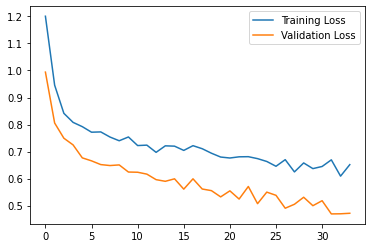

In [ ]:
length = len(train_loss_epoch)
epochs = list(range(length))

plt.plot(epochs, train_loss_epoch)
plt.plot(epochs, val_loss_epoch)

plt.legend(["Training Loss", "Validation Loss"], loc='upper right')
plt.show()



In [ ]:
## saving Model 

#saving the model 
model_save_name = 'exam_3_model_emotion.pth'
path = F"/content/gdrive/My Drive/DS405B_NLP/{model_save_name}" 
torch.save(model_emotion, path)




In [ ]:
## evaluating accuracy-wise 

all_data_emotion = 0
tp_emotion = 0


with torch.no_grad():
  
  for batch in train_dataloader_emotion:
    sent_id, mask, labels = batch[0], batch[1], batch[2]
    preds = model_emotion(sent_id.to(device), mask.to(device))

    # getting the predictions
    prediction_list = list(np.argmax(preds.cpu().detach().numpy(), axis = 1))

    labels_list = list(labels.cpu().detach().numpy())

    ## computing true positives and summing up all data points 
    for i in range(len(prediction_list)):
      all_data_emotion += 1
      if prediction_list[i] == labels_list[i]:
        tp_emotion += 1
   
   

In [ ]:
print(f"The accuracy score for the validation set of the Emotion Data based on the supervised method is {tp_emotion/all_data_emotion}")

The accuracy score for the validation set of the Emotion Data based on the supervised method is 0.819672131147541


## Performance Comparison

Finally, here is an overview of all results

In [ ]:
import pandas as pd 

data = ["Yahoo Answer", "Banking", "Emotion", "Sentiment"]
Yahoo_Answer = [0.155, 0.487, 0.431, 0.456, 'NaN']
Banking = [0.109, 0.595, 0.561, 0.586, 0.932]
Emotion = [0.463, 0.609, 0.629, 0.629, 0.819]
Sentiment = [0.155, 0.487, 0.406, 0.431, 'NaN']


methods = ["Method 1", "Method 2", "Method 3", "Method 4 (best value)", "Supervised method"]


In [ ]:
results = pd.DataFrame({'Yahoo_Answer':Yahoo_Answer, 'Banking': Banking, 'Emotion': Emotion, 'Sentiment':Sentiment})

results.index = methods

print(results)

                      Yahoo_Answer  Banking  Emotion Sentiment
Method 1                     0.155    0.109    0.463     0.155
Method 2                     0.487    0.595    0.609     0.487
Method 3                     0.431    0.561    0.629     0.406
Method 4 (best value)        0.456    0.586    0.629     0.431
Supervised method              NaN    0.932    0.819       NaN
